<a href="https://colab.research.google.com/github/patsicko/linear-regression-model/blob/polynomial_regression_model/polynomial_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

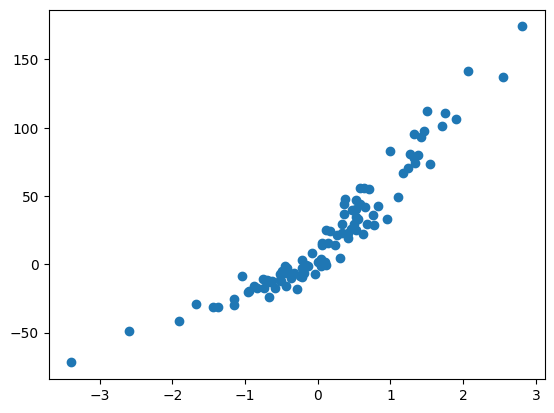

In [465]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

x,y=make_regression(n_samples=100,n_features=1,noise=10)
y=y+abs(y/2)
plt.scatter(x,y)

plt.show()

In [466]:
x.shape

(100, 1)

In [467]:
y=y.reshape(y.shape[0],1)

y.shape

(100, 1)

In [468]:
x.shape

(100, 1)

In [469]:
X=np.hstack((x,np.ones(x.shape)))

X=np.hstack((x**2,X))

X.shape

(100, 3)

In [470]:
theta=np.random.rand(3,1)
theta

array([[0.66592745],
       [0.01977706],
       [0.73559741]])

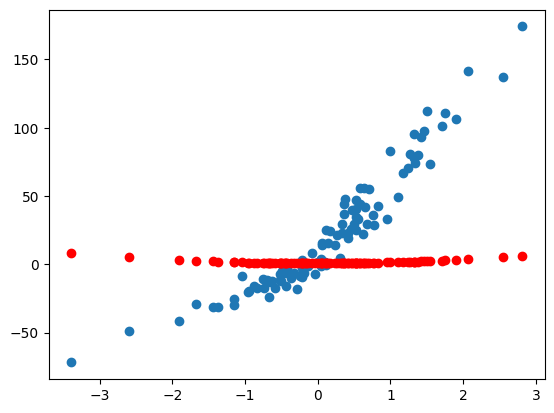

In [471]:
def model(X,theta):
  return X.dot(theta)

pred=model(X,theta)

plt.scatter(x[:,0],y)
plt.scatter(x[:,0],pred,c='r')
plt.show()

In [472]:
def costFunction(X,y,theta):
  m=len(y)
  return (1/m*2)*np.sum((model(X,theta)-y)**2)

costFunction(X,y,theta)

4818.050017780987

In [473]:
def grad(X,y,theta):
  m=len(y)
  return (1/m)*X.T.dot(model(X,theta)-y)
grad(X,y,theta)

array([[-40.27221634],
       [-44.83201409],
       [-21.38754154]])

In [474]:
def gradient_descent(X,y,theta,n_learningrate,n_iteration):

  cost_history=np.zeros(n_iteration)
  for i in range(0,n_iteration):
    theta=theta-n_learningrate*grad(X,y,theta)
    cost_history[i]=costFunction(X,y,theta)
  return theta,cost_history


final_theta,cost_history  =gradient_descent(X,y,theta,n_learningrate=0.01,n_iteration=10000)

final_theta



array([[ 6.38314182],
       [41.80149483],
       [10.16481691]])

In [475]:
prediction=model(X,final_theta)

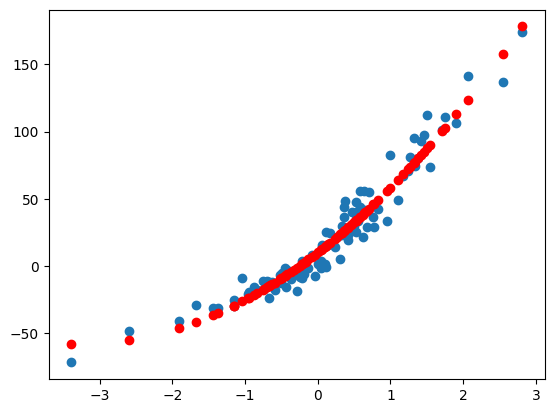

In [476]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],prediction,c='r')
plt.show()

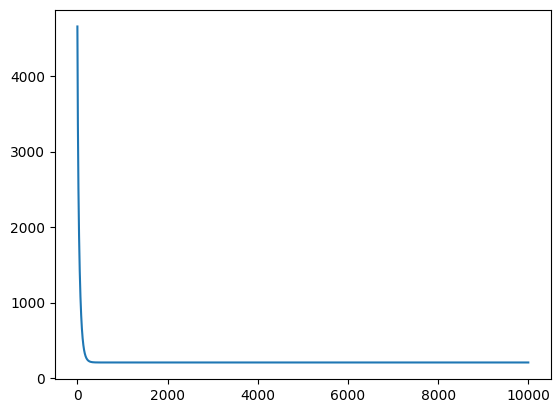

In [477]:
plt.plot(range(10000),cost_history)

In [478]:
def coef_deter(X,y,theta):
  u= (y-model(X,theta)**2).sum()
  v=((y-y.mean())**2).sum()
  return 1-(u/v)
coef_deter(X,y,theta)

0.9901902102402811